In [16]:
from base64 import b64encode
import json
import requests
import os
import dotenv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

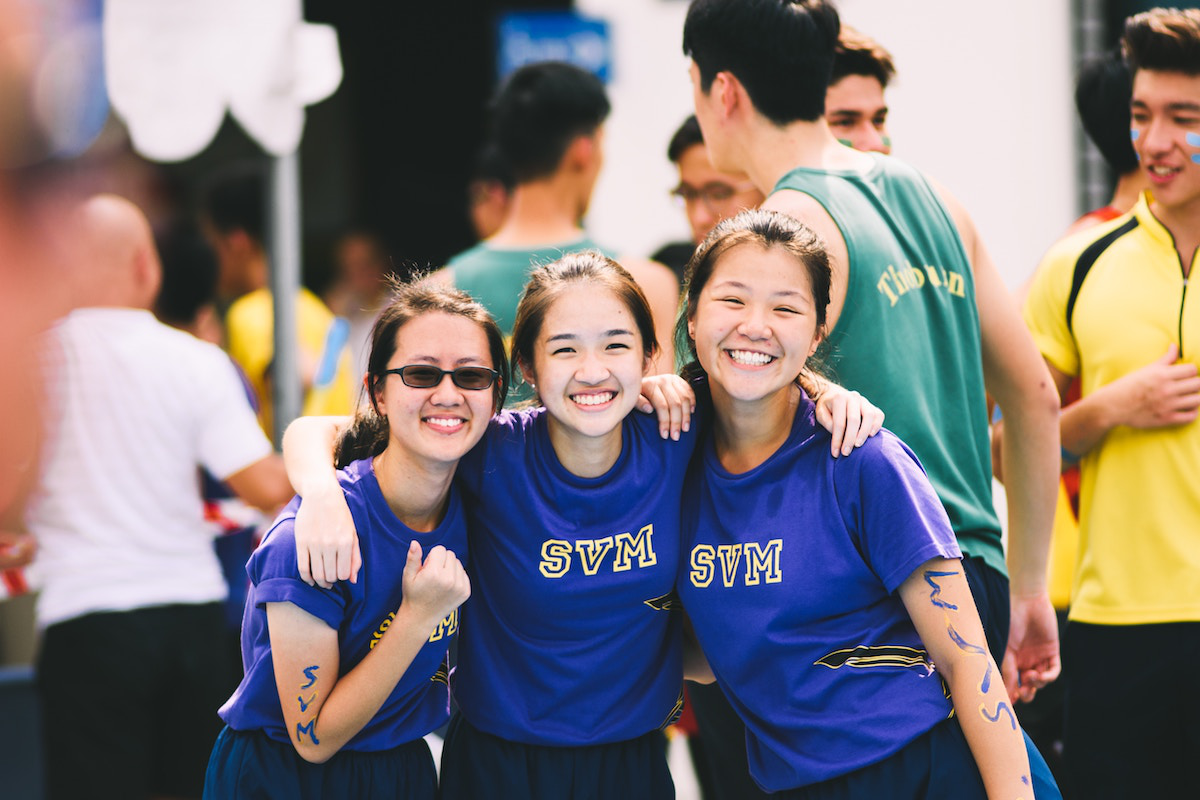

In [17]:
# 対象の画像
image = Image.open('./face.jpg', 'r')
image

In [8]:
# env読み込み
dotenv.load_dotenv('./.env')
# key取得
api_key = os.environ.get('API_KEY')

In [6]:
endpoint_url = 'https://vision.googleapis.com/v1/images:annotate'
# 画像ファイル読み込み
f = open('./face.jpg', 'rb')
# base64にエンコード
ctxt = b64encode(f.read()).decode()

In [7]:
# reuest内容
img_requests = [{
    'image': {'content': ctxt},
    'features': [{
        'type': 'FACE_DETECTION',
        'maxResults': 10
    }]
}]

In [9]:
# リクエスト送信
response = requests.post(endpoint_url,
                         data=json.dumps({'requests': img_requests}).encode(),
                         params={'key': api_key},
                         headers={'Content-Type': 'application/json'})

In [13]:
# response結果
print(json.dumps(response.json(), indent=4))

{
    "responses": [
        {
            "faceAnnotations": [
                {
                    "boundingPoly": {
                        "vertices": [
                            {
                                "x": 512,
                                "y": 260
                            },
                            {
                                "x": 671,
                                "y": 260
                            },
                            {
                                "x": 671,
                                "y": 445
                            },
                            {
                                "x": 512,
                                "y": 445
                            }
                        ]
                    },
                    "fdBoundingPoly": {
                        "vertices": [
                            {
                                "x": 526,
                                "y": 308
                           

In [14]:
# response.json()はfaceAnnnotationsに輪郭に関するデータ、fdBoundingPolyがある
# それと、landmarksには目と口とか耳とかの位置が入っている
# 認識した顔の個数分データが入っている。
data = response.json()['responses'][0]['faceAnnotations']

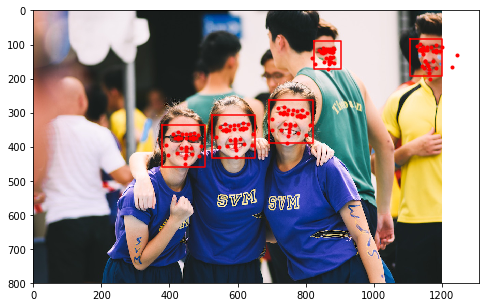

In [21]:
# 画像の上に、認識範囲や、目とか鼻の位置をプロット
plt.figure(figsize=(8, 6))
im = Image.open('./face.jpg', 'r')
plt.imshow(np.asarray(im))
# 輪郭のプロット
for fd in data:
    fd_bounds = fd['fdBoundingPoly']['vertices']
    graph_data = []
    for row in fd_bounds:
        graph_data.append([row['x'], row['y']])
    # 1個目のデータを最後に追加
    graph_data.append(graph_data[0])
    graph_ = np.array(graph_data).T
    
    plt.plot(graph_[0], graph_[1], c='r')
    
# 目や口などのパーツの認識結果
for land in data:
    positions_data = land['landmarks']
    mark_data = []
    for row in positions_data:
        mark_data.append([row['position']['x'], row['position']['y']])
    graph_data = np.array(mark_data).T
    plt.scatter(graph_data[0], graph_data[1], c='r', marker='.')